In [1]:
#tratamiento de datos
import pandas as pd

#configuracion de visualizacion
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

#exploracion de archivos
import sys
sys.path.append('../')

#funciones personalizadas
from SRC import sp_eda as se
from SRC import sp_limpieza as sl
from SRC import sp_nulos as sn
from SRC import sp_visualizaciones as sv

#visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
date_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'review_creation_date']

df = pd.read_csv('../datos/df_data_no_nulos.csv', parse_dates=date_cols)
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

# ANALISIS

## DISTRIBUCION DE COLUMNAS CATEGORICAS

### VISUALIZACION DE FRECUENCIAS

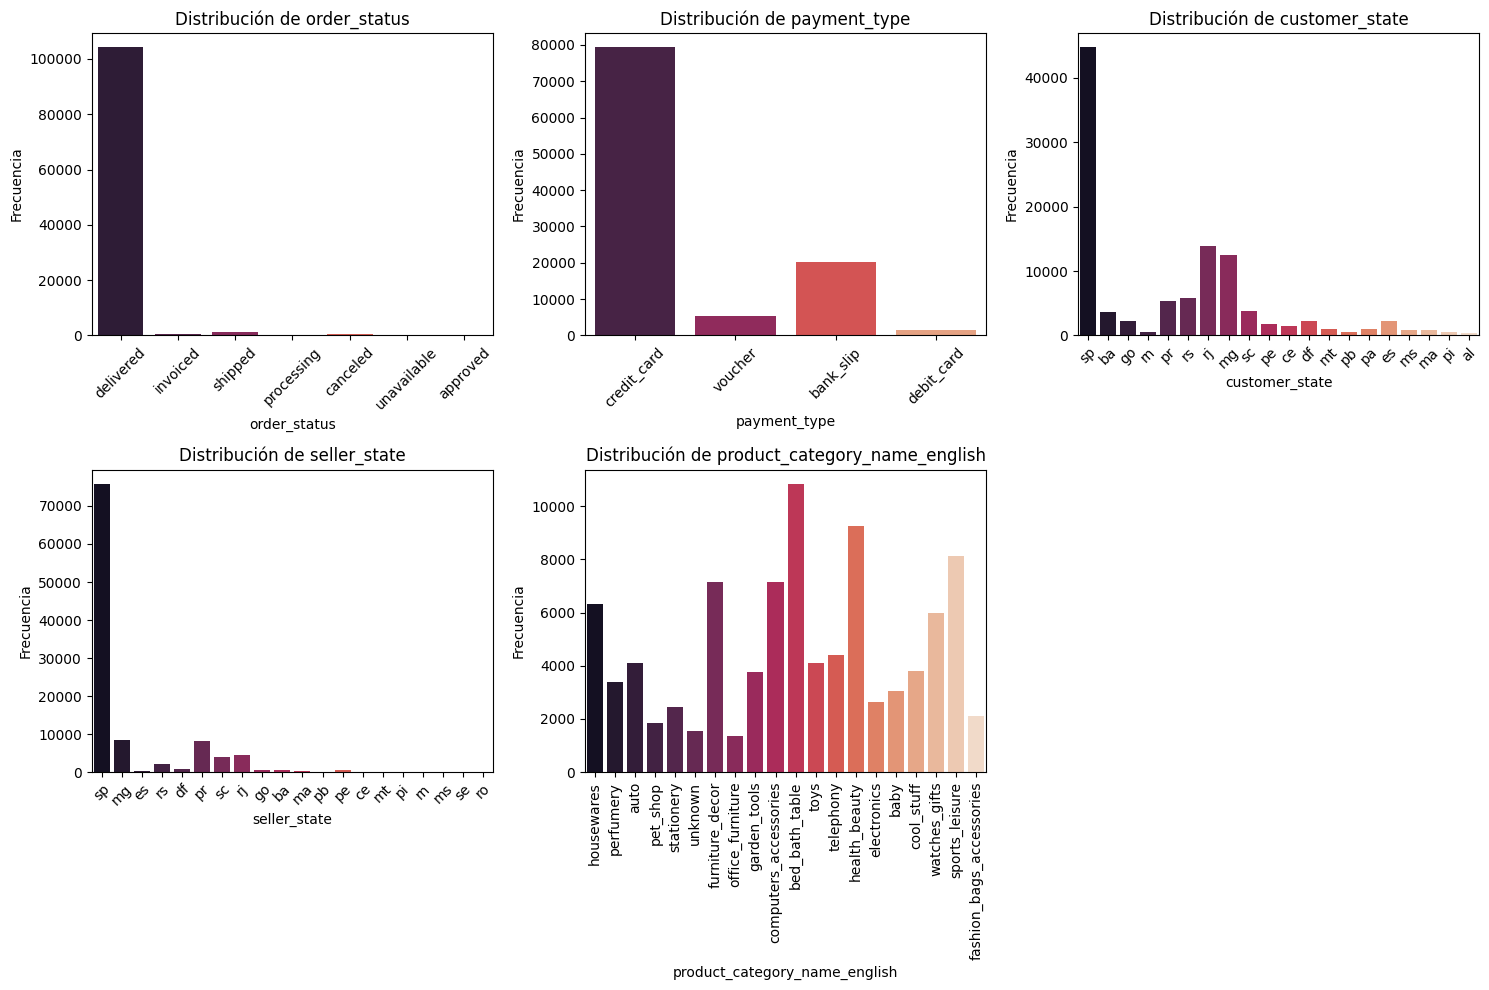

In [3]:
sv.subplot_col_cat(df,['order_id', 'customer_id', 'product_id', 'seller_id', 'review_id'])

### CALCULO DE FRECUENCIAS

In [4]:
sn.estadist_col_cat(df)

ORDER_STATUS
order_status
delivered      97.804549
shipped         1.114614
canceled        0.460670
invoiced        0.314306
processing      0.297418
unavailable     0.006568
approved        0.001876
Name: count, dtype: float64
------------------------
PAYMENT_TYPE
payment_type
credit_card    74.472716
bank_slip      19.087293
voucher         4.952901
debit_card      1.487090
Name: count, dtype: float64
------------------------
CUSTOMER_STATE
customer_state
sp    41.996923
rj    13.040419
mg    11.670607
rs     5.506455
pr     5.007318
sc     3.614051
ba     3.445170
df     2.141034
go     2.049088
es     2.046273
pe     1.646589
ce     1.335097
pa     0.971065
mt     0.932598
ma     0.740261
ms     0.713053
pb     0.539481
pi     0.500075
rn     0.493507
al     0.409067
se     0.334009
to     0.281468
ro     0.248630
am     0.146363
ac     0.079749
ap     0.067552
rr     0.044097
Name: count, dtype: float64
------------------------
SELLER_STATE
seller_state
sp    71.114801
mg     7.9

- 'oder_status': Existe una tasa de entrega exitosa, con un 97.8% de estatus 'delivered'
- 'payment_type': El método predominante es el de 'credit_card' con un 74.4%
- 'customer_state': Para la ubicación de customer, existe una concentración geográfica en Sao Paulo del 42%
- 'seller_state': Para la ubicación de vendedor, existe una concentración geográfica en Sao Paulo del 71%
- 'product_category_name_english': Las top 5 categorías representan un 37%

## DISTRIBUCION DE COLUMNAS NUMERICAS

### VISUALIZACION DE FRECUENCIAS

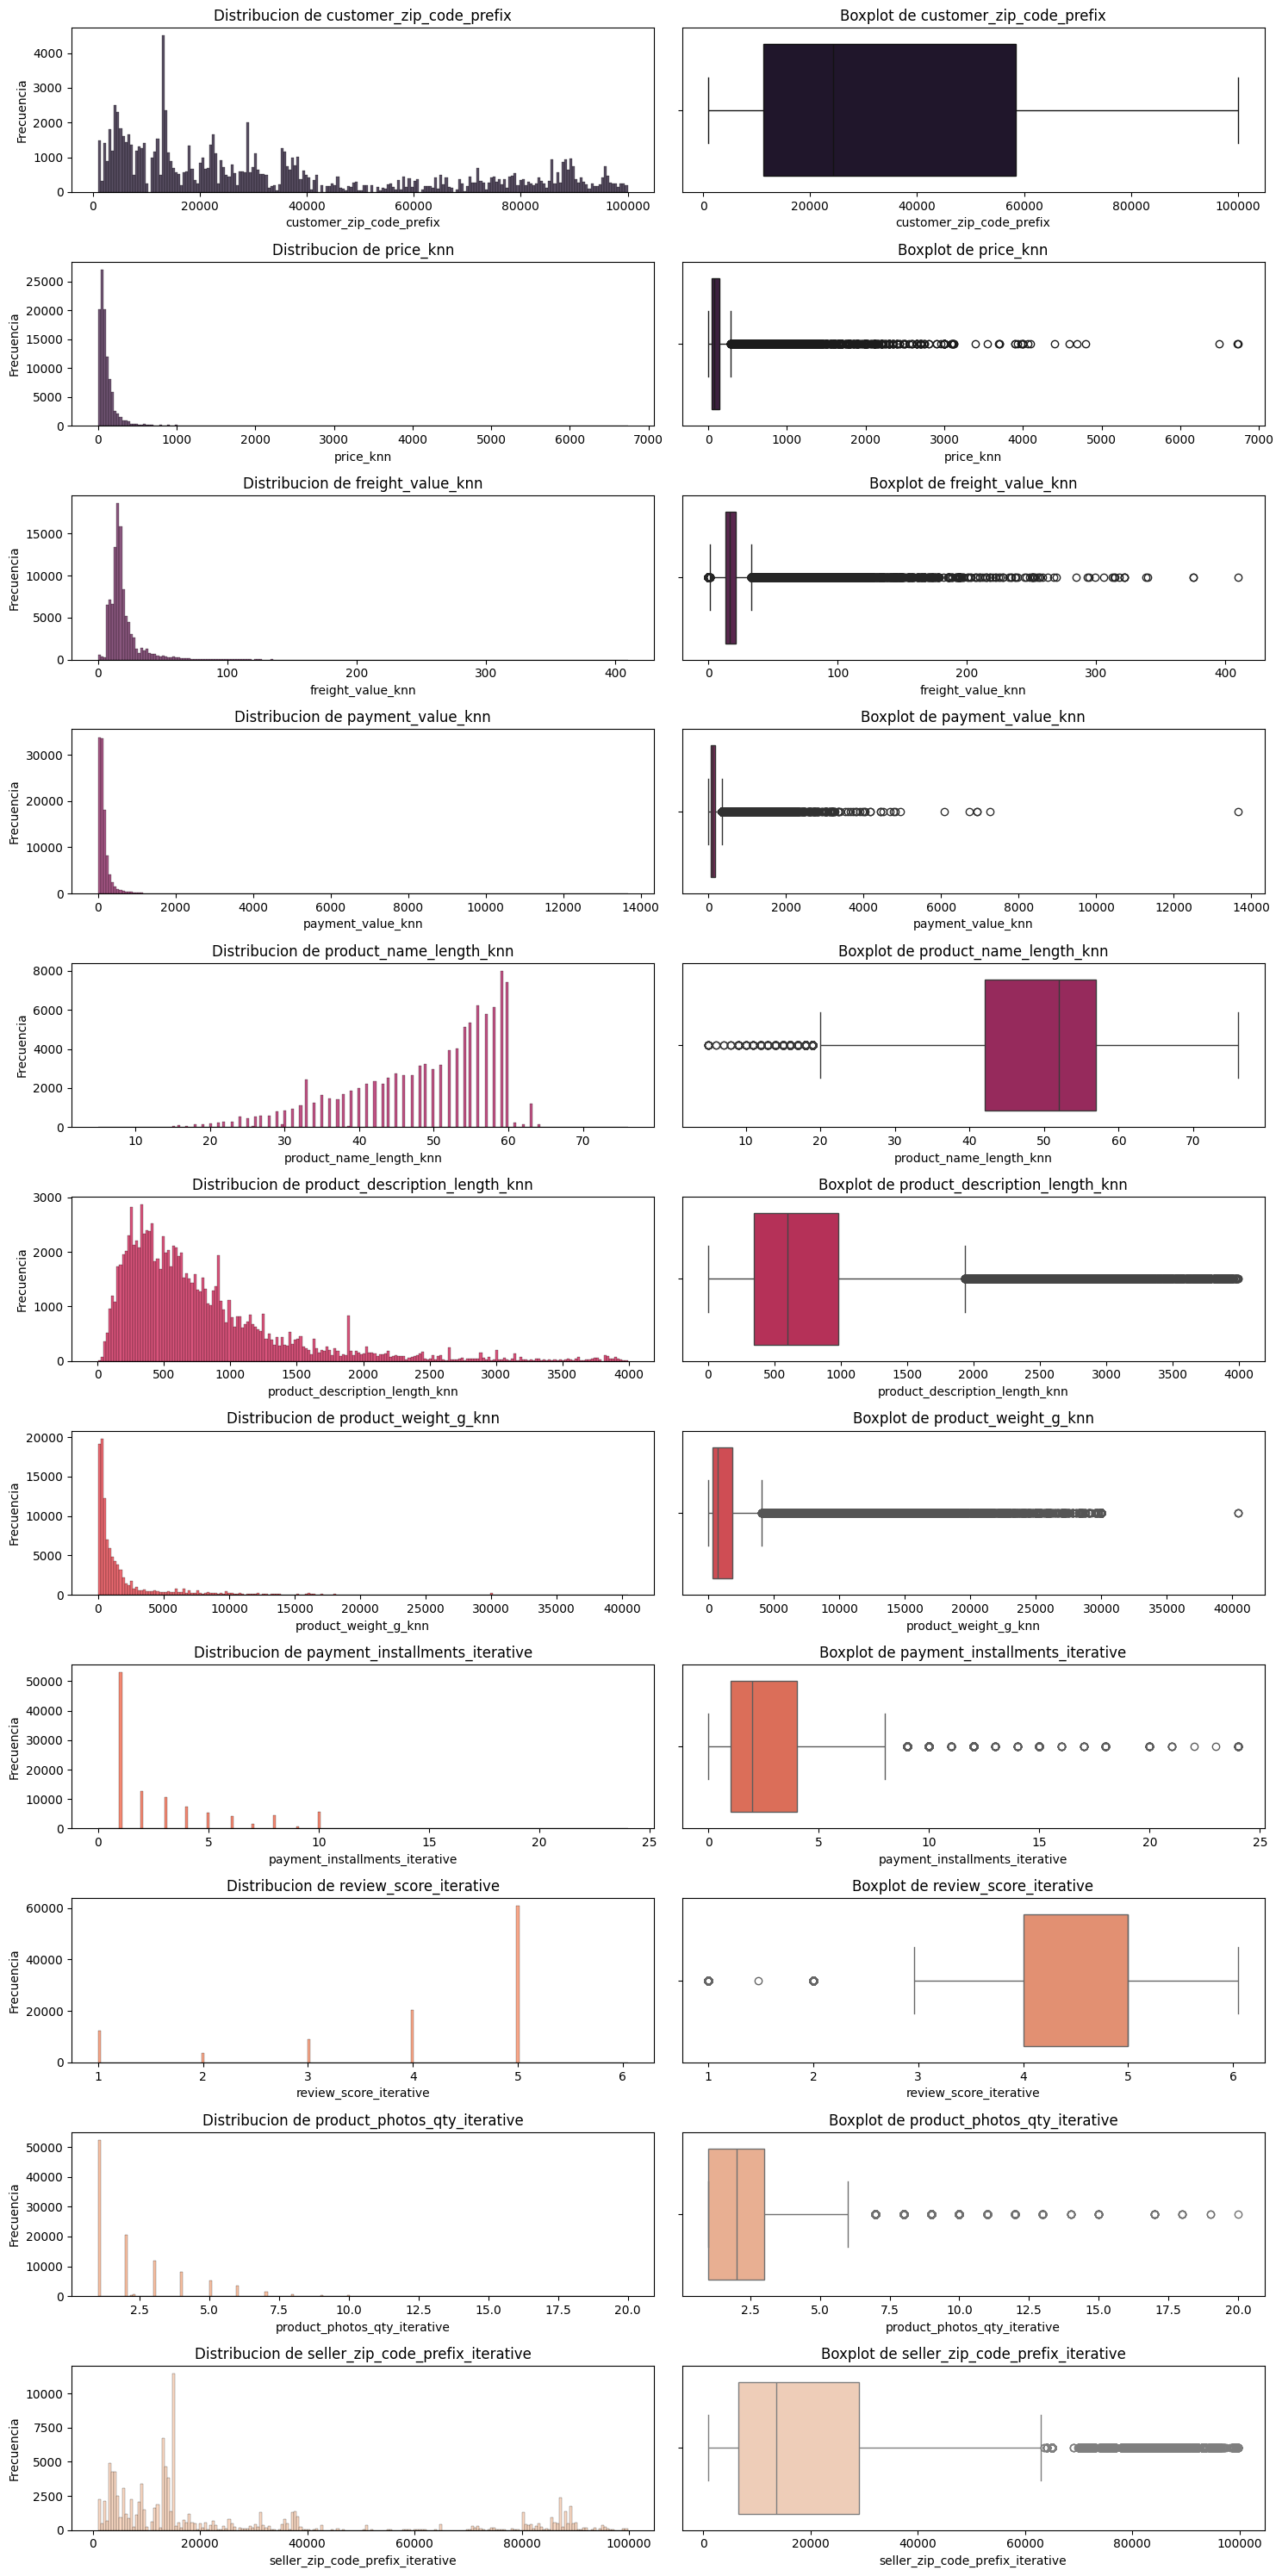

In [5]:
sv.subplot_col_num(df)

### Medidas estadísticas

In [6]:
df.select_dtypes(include=['int64', 'float64']).describe().T

count          mean           std  \
customer_zip_code_prefix          106584.0  35064.799932  29760.195037   
price_knn                         106584.0    124.322880    189.602103   
freight_value_knn                 106584.0     20.137443     15.904376   
payment_value_knn                 106584.0    157.899526    218.812318   
product_name_length_knn           106584.0     48.813944     10.002214   
product_description_length_knn    106584.0    784.609270    648.130265   
product_weight_g_knn              106584.0   2102.349814   3774.160011   
payment_installments_iterative    106584.0      2.909757      2.730759   
review_score_iterative            106584.0      4.073170      1.350774   
product_photos_qty_iterative      106584.0      2.235751      1.727229   
seller_zip_code_prefix_iterative  106584.0  24567.572713  27620.515894   

                                      min       25%        50%         75%  \
customer_zip_code_prefix          1003.00  11333.75  24360.000  58423.0000   
price_knn                            0.85     40.00     78.000    139.0000   
freight_value_knn                    0.00     13.15     16.340     21.2200   
payment_value_knn                    0.00     58.22    102.815    176.7125   
product_name_length_knn              5.00     42.00     52.000     57.0000   
product_description_length_knn       4.00    348.00    602.000    982.0000   
product_weight_g_knn                 0.00    300.00    700.000   1800.0000   
payment_installments_iterative       0.00      1.00      2.000      4.0000   
review_score_iterative               1.00      4.00      5.000      5.0000   
product_photos_qty_iterative         1.00      1.00      2.000      3.0000   
seller_zip_code_prefix_iterative  1001.00   6506.00  13660.000  29142.0000   

                                           max  
customer_zip_code_prefix          99990.000000  
price_knn                          6735.000000  
freight_value_knn                   409.680000  
payment_value_knn                 13664.080000  
product_name_length_knn              76.000000  
product_description_length_knn     3992.000000  
product_weight_g_knn              40425.000000  
payment_installments_iterative       24.000000  
review_score_iterative                6.047559  
product_photos_qty_iterative         20.000000  
seller_zip_code_prefix_iterative  99730.000000

## Outliers

In [7]:
sn.calculo_outliers(df,df.select_dtypes(include=['int64', 'float64']).columns)

En la columna CUSTOMER_ZIP_CODE_PREFIX tenenemos un total de 0 outliers, lo que representa un 0.0% del total
En la columna PRICE_KNN tenenemos un total de 7998 outliers, lo que representa un 7.5039405539292945% del total
En la columna FREIGHT_VALUE_KNN tenenemos un total de 11596 outliers, lo que representa un 10.879681753358852% del total
En la columna PAYMENT_VALUE_KNN tenenemos un total de 8190 outliers, lo que representa un 7.684080162125648% del total
En la columna PRODUCT_NAME_LENGTH_KNN tenenemos un total de 709 outliers, lo que representa un 0.6652030323500713% del total
En la columna PRODUCT_DESCRIPTION_LENGTH_KNN tenenemos un total de 6638 outliers, lo que representa un 6.227951662538468% del total
En la columna PRODUCT_WEIGHT_G_KNN tenenemos un total de 15067 outliers, lo que representa un 14.13626810778353% del total
En la columna PAYMENT_INSTALLMENTS_ITERATIVE tenenemos un total de 6839 outliers, lo que representa un 6.416535314869024% del total
En la columna REVIEW_SCORE_

- 'price_knn': Muestra un 7.5% de outliers. 
- 'freight_value_knn': Presenta un 10.8% de outliers.
- 'review_score': El 60% de los compradores da 5 estrellas, lo que supone clientes muy satisfechos.
- 'product_weight_g:' Presenta un 14% de outliers lo cual tiene logica teniendo en cuenta los productos pesados.

- De los cálculos estadísticos podemos extraer que:

-   Precio promedio: $124 (25 USD)  Productos accesibles
-	Envío promedio: $20 (16% del precio) Coste razonable
-	Rating promedio: 4.07-5 Alta satisfacción de los consumidores
-	Cuotas promedio: 2.9 Financiación común


## Matriz de correlación

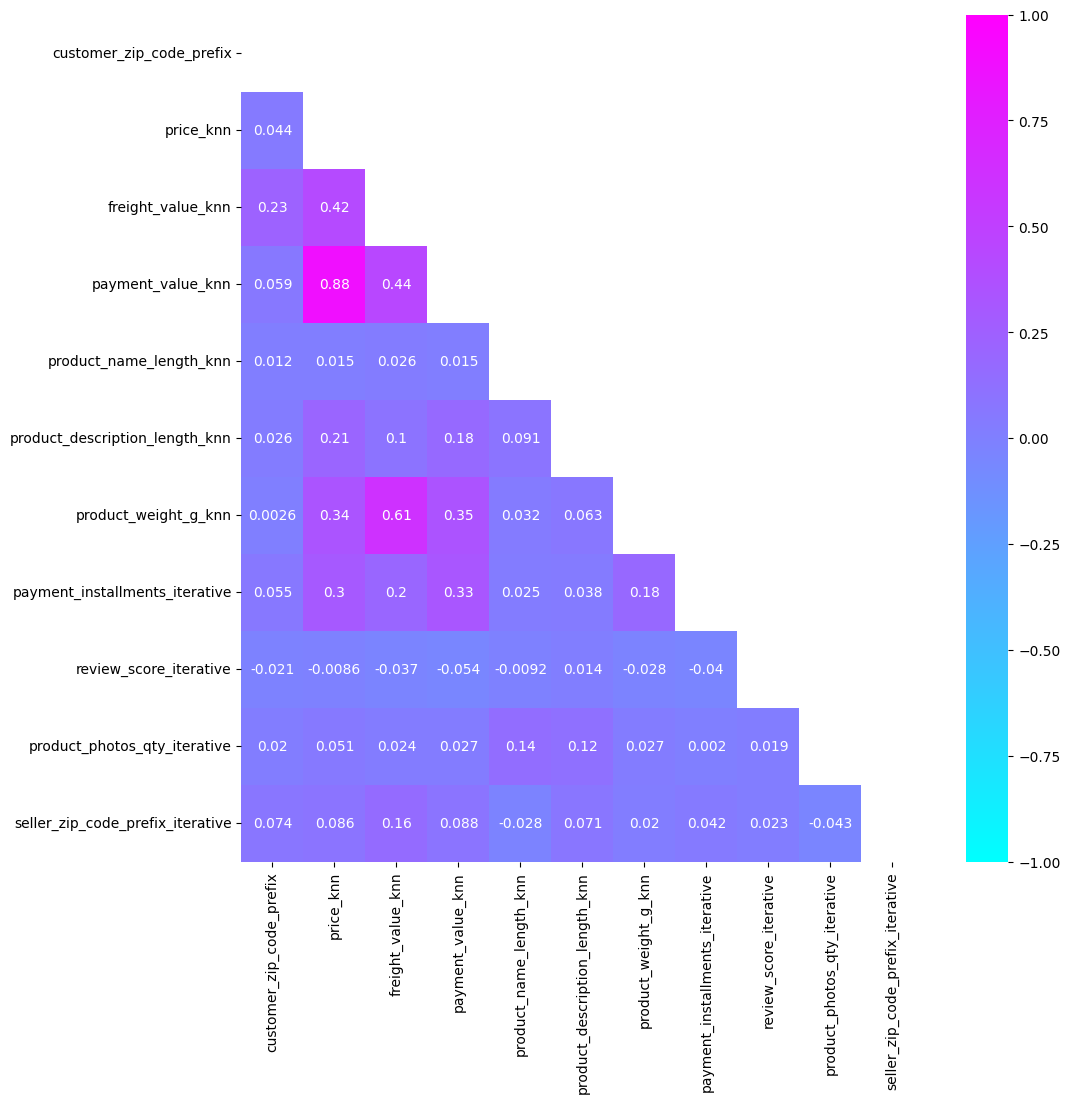

In [8]:
sv.matriz_correlacion(df)

Elemetos a destacar:

Correlaciones FUERTES (>0.4):
* price --- freight_value: 0.42 (A mayor precio, mayor envío)
* price --- payment_value: 0.88 (payment = price + freight)
* freight_value --- payment_value: 0.44 (Coherente)

Correlaciones DÉBILES pero interesantes:
* product_weight_g - freight_value: 0.61 --- Productos pesados implica envíos caros
* product_weight_g - price: 0.34 --- Productos pesados implican precios del producto algo más caros
* review_score - TODAS: 0,0 --- La satisfacción del consumidor no depende del precio

Conclusión a destacar:

La satisfacción del consumidor no esta relacionada con el precio del producto.



## Mapa geografico - ventas por estado

In [9]:
sv.mapa_coropletas_estado(df, columna_estado='customer_state',
                          columna_conteo='order_id',
                          columna_suma='payment_value_knn')

## Evolución temporal

### Total pedidos mensuales:

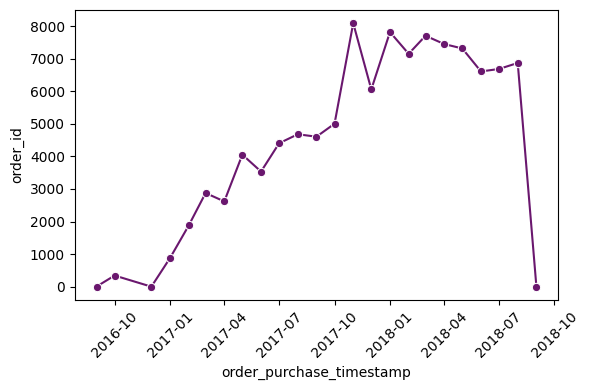

In [10]:
sv.lineplot_mensual(df, eje_x='order_purchase_timestamp', eje_y='order_id', agregacion='count')

### Total ventas mensuales:

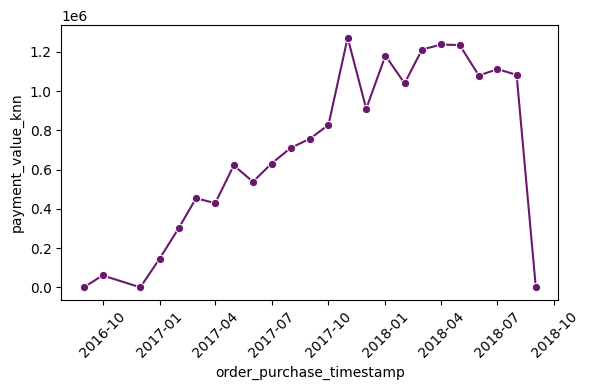

In [11]:
sv.lineplot_mensual(df, eje_x='order_purchase_timestamp', eje_y='payment_value_knn', agregacion='sum')

###  Review score promedio por mes:

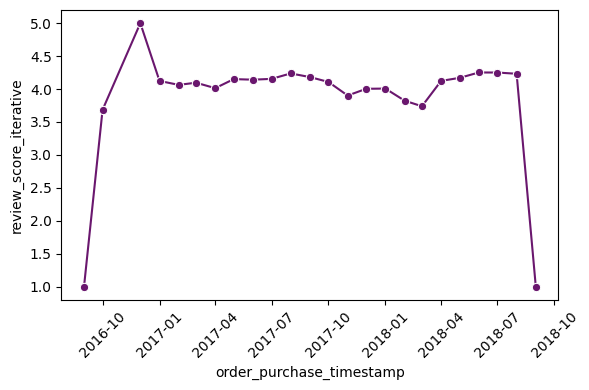

In [12]:
sv.lineplot_mensual(df, eje_x='order_purchase_timestamp', eje_y='review_score_iterative', agregacion='mean')

###  Tiempo de entrega promedio por mes:

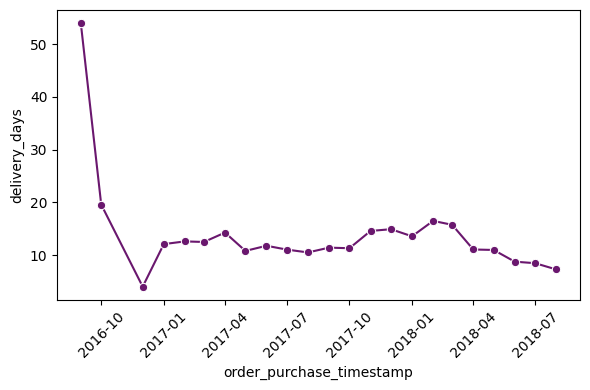

In [13]:
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
sv.lineplot_mensual(df, eje_x='order_purchase_timestamp', eje_y='delivery_days', agregacion='mean')
                       

## Variable objetivo vs numéricas

In [14]:
col_num = 'review_score_iterative'
cols_num = ['payment_value_knn', 'delivery_days', 'price_knn']

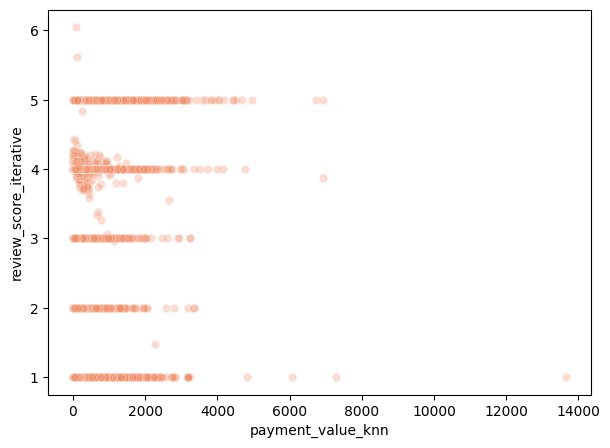

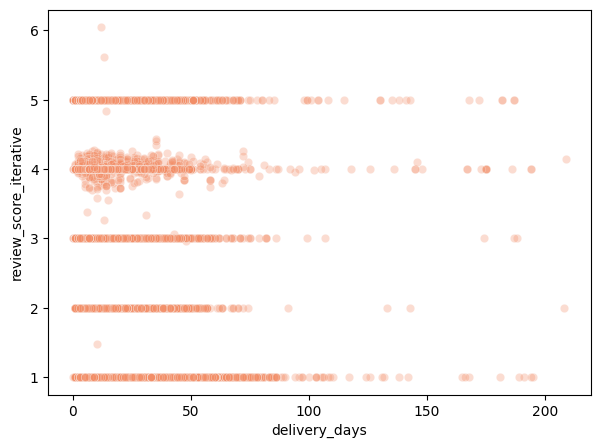

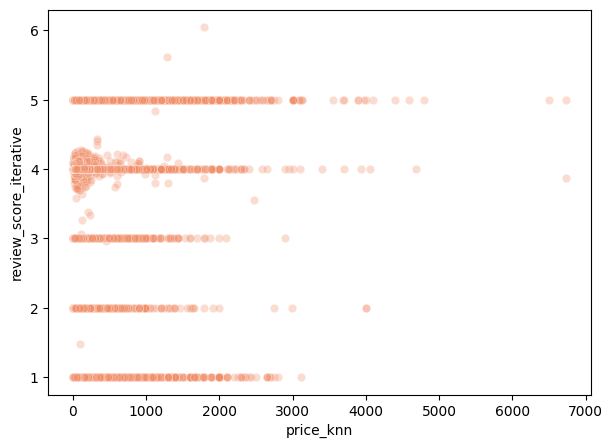

In [15]:
for col in cols_num:
    if col == col_num:
        continue
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x= col, y=col_num, color= '#F28E67', alpha= 0.3)
    #plt.yscale('log')
    plt.show()

## Variable objetivo vs categóricas

In [16]:
variables_relevantes = ['order_status',
 'payment_type',
 'customer_state',
 'seller_state',
 'product_category_name_english']

--------------------------------
Promedio de review_score_iterative por ORDER_STATUS
--------------------------------
order_status
delivered      4.12
approved       2.50
shipped        2.13
invoiced       1.71
canceled       1.68
unavailable    1.57
processing     1.34
Name: review_score_iterative, dtype: float64


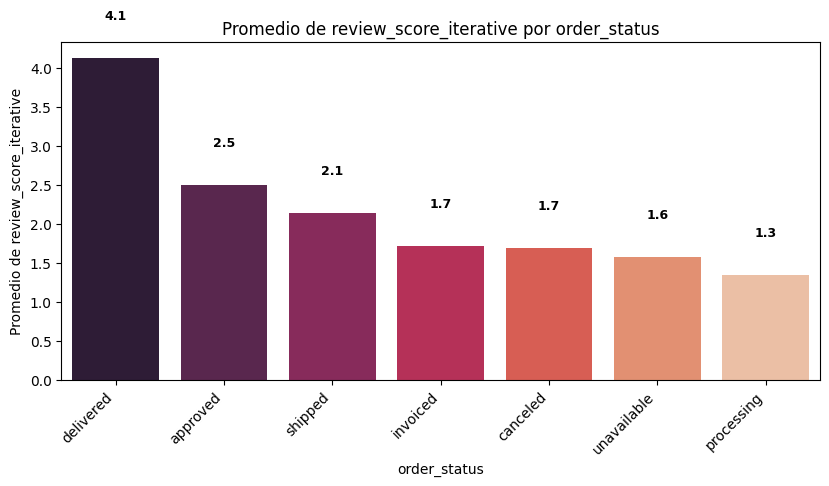

--------------------------------
Promedio de review_score_iterative por PAYMENT_TYPE
--------------------------------
payment_type
debit_card     4.16
bank_slip      4.08
credit_card    4.07
voucher        4.01
Name: review_score_iterative, dtype: float64


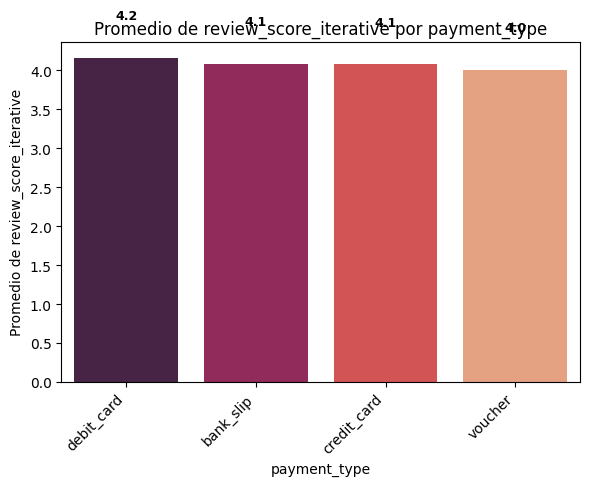

--------------------------------
Promedio de review_score_iterative por CUSTOMER_STATE
--------------------------------
customer_state
am    4.18
ap    4.18
pr    4.17
sp    4.17
ms    4.13
mg    4.13
to    4.10
rs    4.09
ro    4.09
rn    4.08
sc    4.06
df    4.04
go    4.02
ac    4.02
pb    4.01
es    4.01
pe    4.00
mt    3.97
rj    3.87
pi    3.87
ce    3.86
ba    3.85
se    3.85
pa    3.83
al    3.75
ma    3.70
rr    3.55
Name: review_score_iterative, dtype: float64


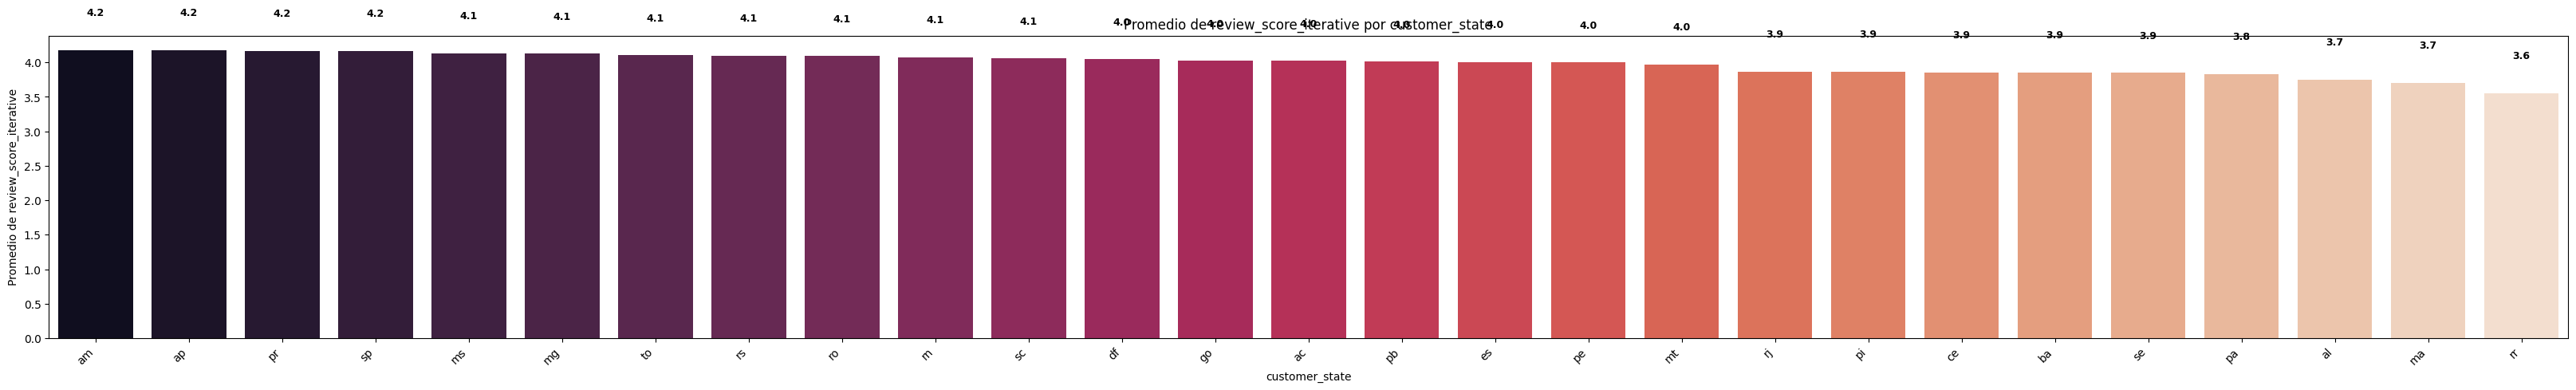

--------------------------------
Promedio de review_score_iterative por SELLER_STATE
--------------------------------
seller_state
pa    4.50
ms    4.46
rn    4.31
rs    4.27
go    4.27
pe    4.22
mt    4.18
mg    4.15
ce    4.15
rj    4.14
sc    4.12
ba    4.11
pr    4.10
pi    4.08
df    4.06
es    4.05
sp    4.05
ma    3.98
pb    3.86
ro    3.86
se    3.78
am    2.33
ac    1.00
Name: review_score_iterative, dtype: float64


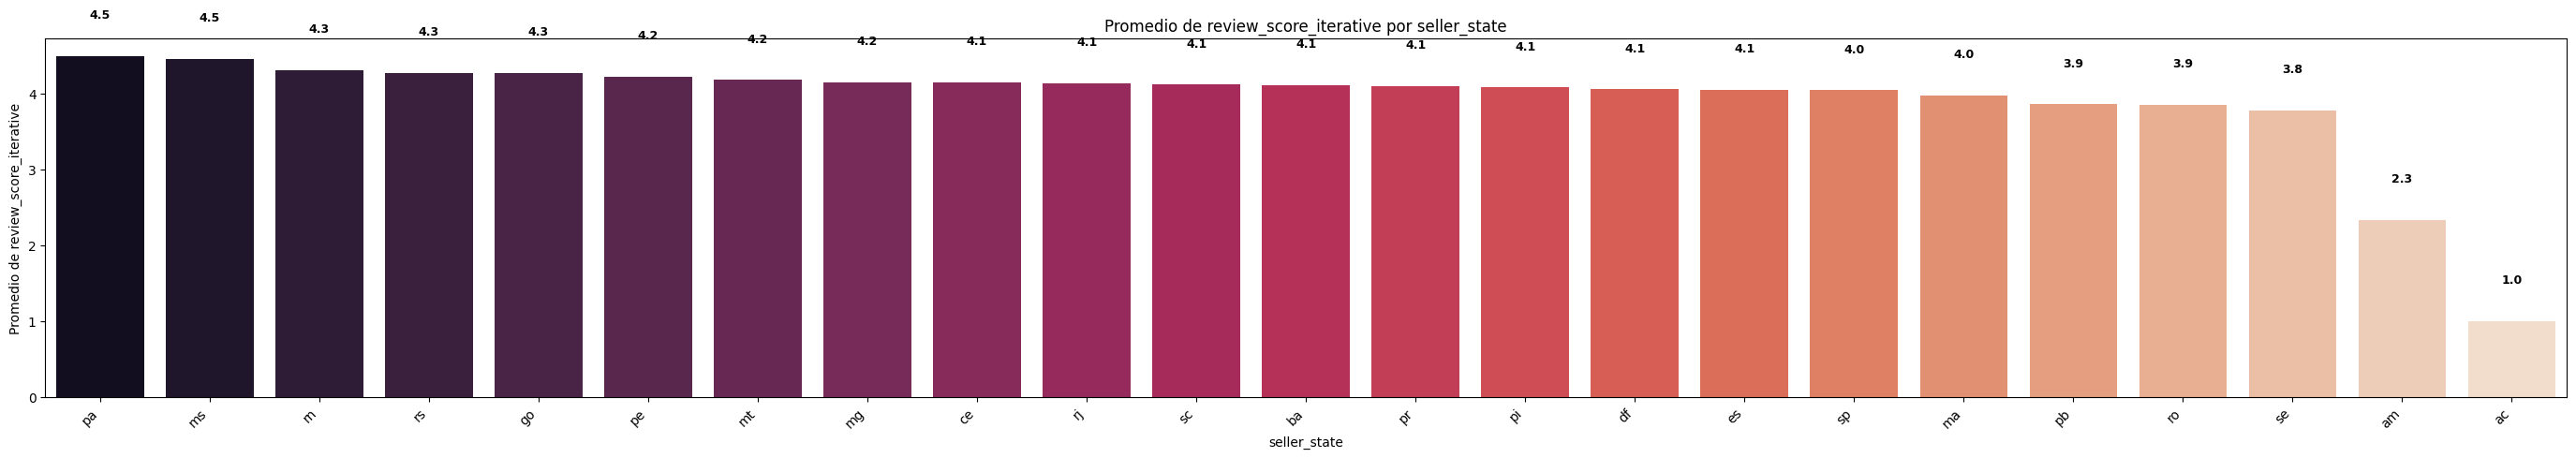

--------------------------------
Promedio de review_score_iterative por PRODUCT_CATEGORY_NAME_ENGLISH
--------------------------------
product_category_name_english
cds_dvds_musicals                          4.67
fashion_childrens_clothes                  4.50
books_general_interest                     4.43
books_imported                             4.41
food_drink                                 4.40
costruction_tools_tools                    4.39
books_technical                            4.38
flowers                                    4.38
la_cuisine                                 4.33
small_appliances_home_oven_and_coffee      4.32
luggage_accessories                        4.31
food                                       4.27
fashion_sport                              4.26
stationery                                 4.22
pet_shop                                   4.21
fashion_shoes                              4.21
cine_photo                                 4.21
industry_commerce_a

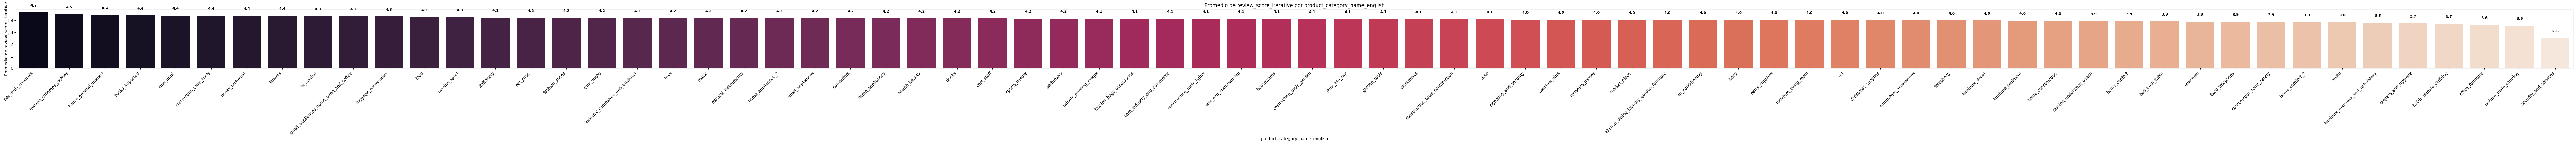

In [17]:
sv.objetivo_vs_categoricas(df, variables_relevantes, target='review_score_iterative')